![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

## 1. Libraries

To start, let's load those libraries that we need

In [1]:
from tensorflow import keras as ks
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization


import numpy as np
import time
import datetime

## 2. Models Network architecture

### 1. Simple model with with 2 Convolutional layer a 2 max pooling layer and 2 dense layers

In [2]:

model = ks.Sequential()

model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                           padding='same', input_shape=(32,32,3)))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                           padding='same', input_shape=(32,32,3)))
model.add(ks.layers.MaxPooling2D((2, 2)))

model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(32, activation='relu'))
model.add(ks.layers.Dense(10, activation='softmax'))


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 32)                1

### 2.2. Model changing batch size

In [2]:
# Recreating the model changing the batch size, we will change the batch size in the tranining fit function to see the difference in the performance

batch_model = ks.Sequential()

batch_model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                           padding='same', input_shape=(32,32,3)))
batch_model.add(ks.layers.MaxPooling2D((2, 2)))
batch_model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                           padding='same', input_shape=(32,32,3)))
batch_model.add(ks.layers.MaxPooling2D((2, 2)))

batch_model.add(ks.layers.Flatten())
batch_model.add(ks.layers.Dense(32, activation='relu'))
batch_model.add(ks.layers.Dense(10, activation='softmax'))


In [3]:
batch_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 32)                1

### 2.3. Multiple convolutional layers

In [2]:
# Recreating de model adding multiple convolutional layers

cnn_model = ks.Sequential()

cnn_model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                           padding='same', input_shape=(32,32,3)))
cnn_model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                           padding='same'))
cnn_model.add(ks.layers.MaxPooling2D((2, 2)))
cnn_model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                           padding='same'))
cnn_model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                           padding='same'))
cnn_model.add(ks.layers.MaxPooling2D((2, 2)))
cnn_model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu',
                           padding='same'))
cnn_model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu',
                           padding='same'))
cnn_model.add(ks.layers.MaxPooling2D((2, 2)))

cnn_model.add(ks.layers.Flatten())
cnn_model.add(ks.layers.Dense(128, activation='relu'))
cnn_model.add(ks.layers.Dense(10, activation='softmax'))

In [3]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

### 2.4. Multiple convolutional layers with dropouts and batch normalization

In [2]:
# Recreating de model adding multiple convolutional layers adding dropouts and batch normalization, name of the model: dropout_model.
# After starting trying with just dropouts in the dense layer, tried also with just adding dropouts , we just found that adding also batch normalization after every convolution got us the best results.

dropout_model = ks.Sequential()

dropout_model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                           padding='same', input_shape=(32,32,3)))
dropout_model.add(BatchNormalization())
dropout_model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                           padding='same'))
dropout_model.add(BatchNormalization())
dropout_model.add(ks.layers.MaxPooling2D((2, 2)))
dropout_model.add(Dropout(0.25))

dropout_model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                           padding='same'))
dropout_model.add(BatchNormalization())
dropout_model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                           padding='same'))
dropout_model.add(BatchNormalization())
dropout_model.add(ks.layers.MaxPooling2D((2, 2)))
dropout_model.add(Dropout(0.25))

dropout_model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu',
                           padding='same'))
dropout_model.add(BatchNormalization())
dropout_model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu',
                           padding='same'))
dropout_model.add(BatchNormalization())
dropout_model.add(ks.layers.MaxPooling2D((2, 2)))
dropout_model.add(Dropout(0.25))

dropout_model.add(ks.layers.Flatten())
dropout_model.add(ks.layers.Dense(128, activation='relu'))
dropout_model.add(Dropout(0.25))
dropout_model.add(ks.layers.Dense(10, activation='softmax'))




In [3]:
dropout_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

### 2.5. Model with early stopping

In [2]:
# Recreating the same model but adding early stopping, name of the model: stp_model.

stp_model = ks.Sequential()

stp_model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                           padding='same', input_shape=(32,32,3)))
stp_model.add(BatchNormalization())
stp_model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                           padding='same'))
stp_model.add(BatchNormalization())
stp_model.add(ks.layers.MaxPooling2D((2, 2)))
stp_model.add(Dropout(0.25))

stp_model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                           padding='same'))
stp_model.add(BatchNormalization())
stp_model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                           padding='same'))
stp_model.add(BatchNormalization())
stp_model.add(ks.layers.MaxPooling2D((2, 2)))
stp_model.add(Dropout(0.25))

stp_model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu',
                           padding='same'))
stp_model.add(BatchNormalization())
stp_model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu',
                           padding='same'))
stp_model.add(BatchNormalization())
stp_model.add(ks.layers.MaxPooling2D((2, 2)))
stp_model.add(Dropout(0.25))

stp_model.add(ks.layers.Flatten())
stp_model.add(ks.layers.Dense(128, activation='relu'))
stp_model.add(Dropout(0.25))
stp_model.add(ks.layers.Dense(10, activation='softmax'))


In [3]:
stp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [2]:
# Defining the early stopping callback
# We will add the callbacks in the fit function when training

callback_val_loss = EarlyStopping(monitor='val_loss', patience=5)
callback_val_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

### 2.6. Model with data augmentation

In [3]:
# Recreating the model with data augmentation, name of the model: aug_model.
# We will define the data augmentation before the tranining fit function

aug_model = ks.Sequential()

aug_model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                           padding='same', input_shape=(32,32,3)))
aug_model.add(BatchNormalization())
aug_model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                           padding='same'))
aug_model.add(BatchNormalization())
aug_model.add(ks.layers.MaxPooling2D((2, 2)))
aug_model.add(Dropout(0.25))

aug_model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                           padding='same'))
aug_model.add(BatchNormalization())
aug_model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                           padding='same'))
aug_model.add(BatchNormalization())
aug_model.add(ks.layers.MaxPooling2D((2, 2)))
aug_model.add(Dropout(0.25))

aug_model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu',
                           padding='same'))
aug_model.add(BatchNormalization())
aug_model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu',
                           padding='same'))
aug_model.add(BatchNormalization())
aug_model.add(ks.layers.MaxPooling2D((2, 2)))
aug_model.add(Dropout(0.25))

aug_model.add(ks.layers.Flatten())
aug_model.add(ks.layers.Dense(128, activation='relu'))
aug_model.add(Dropout(0.25))
aug_model.add(ks.layers.Dense(10, activation='softmax'))



In [4]:
aug_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

## 3. Optimizer, error function


In [4]:
# 1. Simple model
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# 2.Model changing batch size
batch_model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# 3.Multiple convolutional layers
cnn_model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# 4.Multiple convolutional layers with dropouts
dropout_model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# 5. Model with early stopping
stp_model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# 6. Model with data augmentation
aug_model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 4. We prepare the data

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 28x28 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [6]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
y_train_label = y_train


We obtain an array with all the labels of CIFAR10

In [8]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Let's paint a sample of the images from the CIFAR10 dataset, to see if it looks anything like what we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **. Get_cmap ()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


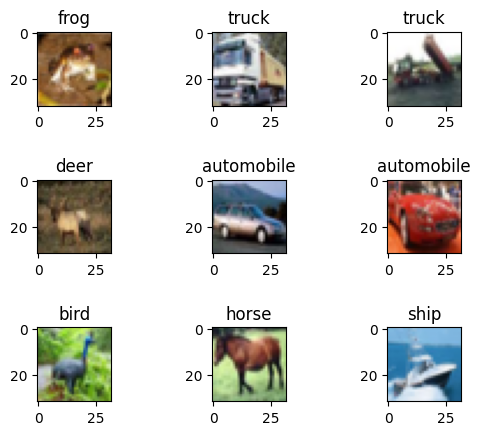

In [9]:
# Lets paint a sample of the images

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

We are we going to want to validate while we train (very practical)

In [10]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [11]:
x_train[0].shape

(32, 32, 3)


we print it to see that everything is correct

In [12]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


## 5. Training

We can start training the model! Be careful, we have to train against the data converted to the format expected by the Convolution.

We will start with 30 epocs, that is, 30 complete passes of the dataset (which in turn will be with mini-batches internally), setting a batch of 64

The .fit() method also allows us to define if we have several CPUs, GPUs, and if we want to validate data at each end of epoch.

In [13]:

t = time.perf_counter()

In [13]:
# 1. Simple model
history = model.fit(x_train, y_train, epochs=20,
                    use_multiprocessing=False, batch_size= 64,
                    validation_data=(x_val, y_val))

Epoch 1/20
625/625 [==============================] - 9s 7ms/step - loss: 1.5624 - accuracy: 0.4352 - val_loss: 1.2944 - val_accuracy: 0.5497
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 1.1868 - accuracy: 0.5828 - val_loss: 1.1381 - val_accuracy: 0.6047
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 1.0534 - accuracy: 0.6339 - val_loss: 1.0441 - val_accuracy: 0.6419
Epoch 4/20
625/625 [==============================] - 5s 8ms/step - loss: 0.9586 - accuracy: 0.6666 - val_loss: 1.0116 - val_accuracy: 0.6517
Epoch 5/20
625/625 [==============================] - 3s 5ms/step - loss: 0.8834 - accuracy: 0.6931 - val_loss: 0.9434 - val_accuracy: 0.6703
Epoch 6/20
625/625 [==============================] - 3s 5ms/step - loss: 0.8222 - accuracy: 0.7167 - val_loss: 0.9700 - val_accuracy: 0.6686
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 0.7719 - accuracy: 0.7320 - val_loss: 0.9781 - val_accuracy: 0.6682
Epoch 

In [13]:
# 2. Simple model changing batch size
history_batch = batch_model.fit(x_train, y_train, epochs=20,
                    use_multiprocessing=False, batch_size= 32,
                    validation_data=(x_val, y_val))

Epoch 1/20
1250/1250 [==============================] - 12s 5ms/step - loss: 1.5068 - accuracy: 0.4553 - val_loss: 1.3234 - val_accuracy: 0.5421
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1366 - accuracy: 0.5986 - val_loss: 1.0906 - val_accuracy: 0.6246
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9852 - accuracy: 0.6555 - val_loss: 1.0173 - val_accuracy: 0.6474
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8999 - accuracy: 0.6840 - val_loss: 0.9511 - val_accuracy: 0.6701
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8326 - accuracy: 0.7111 - val_loss: 0.9309 - val_accuracy: 0.6826
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7774 - accuracy: 0.7290 - val_loss: 0.9166 - val_accuracy: 0.6934
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7290 - accuracy: 0.7458 - val_loss: 0.8988 - val_accuracy

In [13]:
# 3. Model with multiple convolutional layers
history_cnn = cnn_model.fit(x_train, y_train, epochs=20,
                    use_multiprocessing=False, batch_size= 64,
                    validation_data=(x_val, y_val))

Epoch 1/20
625/625 [==============================] - 14s 9ms/step - loss: 1.5751 - accuracy: 0.4175 - val_loss: 1.2747 - val_accuracy: 0.5359
Epoch 2/20
625/625 [==============================] - 5s 8ms/step - loss: 1.0782 - accuracy: 0.6180 - val_loss: 0.9518 - val_accuracy: 0.6595
Epoch 3/20
625/625 [==============================] - 5s 7ms/step - loss: 0.8543 - accuracy: 0.7009 - val_loss: 0.8083 - val_accuracy: 0.7197
Epoch 4/20
625/625 [==============================] - 5s 8ms/step - loss: 0.7199 - accuracy: 0.7494 - val_loss: 0.7485 - val_accuracy: 0.7408
Epoch 5/20
625/625 [==============================] - 5s 8ms/step - loss: 0.6053 - accuracy: 0.7886 - val_loss: 0.7750 - val_accuracy: 0.7333
Epoch 6/20
625/625 [==============================] - 5s 8ms/step - loss: 0.5182 - accuracy: 0.8185 - val_loss: 0.7263 - val_accuracy: 0.7574
Epoch 7/20
625/625 [==============================] - 5s 8ms/step - loss: 0.4222 - accuracy: 0.8532 - val_loss: 0.7508 - val_accuracy: 0.7555
Epoch

In [13]:
# 4. Model with multiple convolutional layers with dropouts and batch normalization
history_dropout = dropout_model.fit(x_train, y_train, epochs=20,
                    use_multiprocessing=False, batch_size= 64,
                    validation_data=(x_val, y_val))

Epoch 1/20
625/625 [==============================] - 17s 15ms/step - loss: 1.6186 - accuracy: 0.4153 - val_loss: 1.3069 - val_accuracy: 0.5242
Epoch 2/20
625/625 [==============================] - 8s 13ms/step - loss: 1.1856 - accuracy: 0.5774 - val_loss: 1.3604 - val_accuracy: 0.5413
Epoch 3/20
625/625 [==============================] - 8s 12ms/step - loss: 0.9818 - accuracy: 0.6526 - val_loss: 0.8781 - val_accuracy: 0.7007
Epoch 4/20
625/625 [==============================] - 8s 12ms/step - loss: 0.8502 - accuracy: 0.7018 - val_loss: 0.7414 - val_accuracy: 0.7390
Epoch 5/20
625/625 [==============================] - 7s 12ms/step - loss: 0.7680 - accuracy: 0.7322 - val_loss: 0.6989 - val_accuracy: 0.7577
Epoch 6/20
625/625 [==============================] - 8s 12ms/step - loss: 0.7038 - accuracy: 0.7552 - val_loss: 0.6996 - val_accuracy: 0.7565
Epoch 7/20
625/625 [==============================] - 8s 12ms/step - loss: 0.6433 - accuracy: 0.7768 - val_loss: 0.6989 - val_accuracy: 0.764

In [14]:
# 5. Model with multiple convolutional layers and early stopping
history_stp = stp_model.fit(x_train, y_train, epochs=50,
                    use_multiprocessing=False, batch_size= 64,
                    validation_data=(x_val, y_val), callbacks=[callback_val_loss, callback_val_accuracy])

Epoch 1/50
625/625 [==============================] - 15s 14ms/step - loss: 1.6182 - accuracy: 0.4175 - val_loss: 1.3880 - val_accuracy: 0.4976
Epoch 2/50
625/625 [==============================] - 8s 12ms/step - loss: 1.1856 - accuracy: 0.5778 - val_loss: 1.0011 - val_accuracy: 0.6439
Epoch 3/50
625/625 [==============================] - 7s 12ms/step - loss: 0.9809 - accuracy: 0.6535 - val_loss: 1.4785 - val_accuracy: 0.5305
Epoch 4/50
625/625 [==============================] - 8s 13ms/step - loss: 0.8637 - accuracy: 0.7009 - val_loss: 0.7390 - val_accuracy: 0.7414
Epoch 5/50
625/625 [==============================] - 8s 12ms/step - loss: 0.7735 - accuracy: 0.7298 - val_loss: 0.7028 - val_accuracy: 0.7552
Epoch 6/50
625/625 [==============================] - 7s 12ms/step - loss: 0.7099 - accuracy: 0.7556 - val_loss: 0.7076 - val_accuracy: 0.7584
Epoch 7/50
625/625 [==============================] - 8s 13ms/step - loss: 0.6502 - accuracy: 0.7755 - val_loss: 0.7104 - val_accuracy: 0.760

In [14]:
# 6.# 6. Model with data augmentation
# Transform target variable into one-hotencoding
y_train_encoded = ks.utils.to_categorical(y_train, 10)
y_test_encoded = ks.utils.to_categorical(y_test, 10)
y_val_encoded = ks.utils.to_categorical(y_val, 10)


In [15]:
# Transformer from images to consumable data for the neural network
# creating variances in the images to get better results in the test
# We have tried with horizontal_flip getting better results, but when trying it along with other parameters as rotaion, rescale, etc, we didn't improve the results.
train_datagen = ImageDataGenerator(
    #rescale=1./255
    #rotation_range=10,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    horizontal_flip=True
    )

train_generator = train_datagen.flow(
    x_train,
    y_train_encoded,
    batch_size=64)


In [16]:
# total number of samples in training set (X_train.shape[0]) divided by the batch_size.
# This division ensures that each sample is seen by the model exactly once per epoch.

steps_per_epoch = x_train.shape[0] // 64 #(batch_size)

In [17]:
# Train the model
history_aug = aug_model.fit(
    train_generator,
    epochs=50,
    steps_per_epoch= steps_per_epoch,
    validation_data=(x_val, y_val_encoded),
    callbacks=[callback_val_loss, callback_val_accuracy]
)

Epoch 1/50
625/625 [==============================] - 18s 16ms/step - loss: 1.5782 - accuracy: 0.4344 - val_loss: 1.1792 - val_accuracy: 0.5713
Epoch 2/50
625/625 [==============================] - 9s 15ms/step - loss: 1.1649 - accuracy: 0.5908 - val_loss: 1.0278 - val_accuracy: 0.6303
Epoch 3/50
625/625 [==============================] - 9s 14ms/step - loss: 0.9827 - accuracy: 0.6518 - val_loss: 0.8631 - val_accuracy: 0.6987
Epoch 4/50
625/625 [==============================] - 9s 15ms/step - loss: 0.8725 - accuracy: 0.6963 - val_loss: 0.7464 - val_accuracy: 0.7336
Epoch 5/50
625/625 [==============================] - 9s 15ms/step - loss: 0.7958 - accuracy: 0.7248 - val_loss: 0.6973 - val_accuracy: 0.7629
Epoch 6/50
625/625 [==============================] - 11s 17ms/step - loss: 0.7314 - accuracy: 0.7509 - val_loss: 0.6829 - val_accuracy: 0.7631
Epoch 7/50
625/625 [==============================] - 10s 15ms/step - loss: 0.6896 - accuracy: 0.7639 - val_loss: 0.6304 - val_accuracy: 0.7

In [19]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:08:34.015983


## 6. We evaluate the results of the different models

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

### 1.Results Simple model

In [14]:
# Obtain the results of the test for every model that we have trained
# Results of first model
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> Test accuracy simple model %.3f' % (acc * 100.0)) # result with this model is 68.540, which is not bad for a simple model but improveable.

> Test accuracy simple model 68.540


### 2.Results model batch size

In [14]:
_, acc_batch = batch_model.evaluate(x_test, y_test, verbose=0)
print('> Test accuracy changing batch size  %.3f' % (acc_batch * 100.0)) # result with this model is 67.570, so we didn't improved the results of the model reducing the batch size (32 instead of 64) but we didn't augmenting it (128 instead of 64), 68.340

> Test accuracy changing batch size  67.570


### 3.Results multiple convolutional model

In [14]:
_, acc_cnn = cnn_model.evaluate(x_test, y_test, verbose=0)
print('> Test accuracy with cnn %.3f' % (acc_cnn * 100.0)) # result with this model is 74.950. After adding multiple convolutions we improved our model, but we didn't still achieve the 80%.

> Test accuracy with cnn 74.950


### 4.Results multiple convolutional model with dropouts and batch normalization

In [14]:
_, acc_drop = dropout_model.evaluate(x_test, y_test, verbose=0)
print('> Test accuracy adding dropouts %.3f' % (acc_drop * 100.0)) # result with this model is 82.810. We've reached the 80% accuracy in the test adding dropouts and batch normalization.

> Test accuracy adding dropouts 82.810


### 5.Results multiple convolutional model with dropouts and batch normalization and early stopping

In [15]:
_, acc_stp = stp_model.evaluate(x_test, y_test, verbose=0)
print('> Test accuracy with early stopping %.3f' % (acc_stp * 100.0)) # result with this model is 82.770. We almost have the same resutls with the model. We'lll try with data augmentation and early stopping together to see if we get better results.

> Test accuracy with early stopping 82.770


### 6.Results multiple convolutional model with dropouts and batch normalization, early stopping and data augmentation

In [18]:
_, acc_aug = aug_model.evaluate(x_test, y_test_encoded, verbose=0)
print('> Test accuracy with data augmentation %.3f' % (acc_aug * 100.0)) # results with data augmentation and early stopping  with just horizontal flip is 85.380.
# After trying also with other parameters the better results were , with .

> Test accuracy with data augmentation 85.380


# 7. Ploting the results of the training and validation of the models

### 1. Simple model with 1 convolutional layer

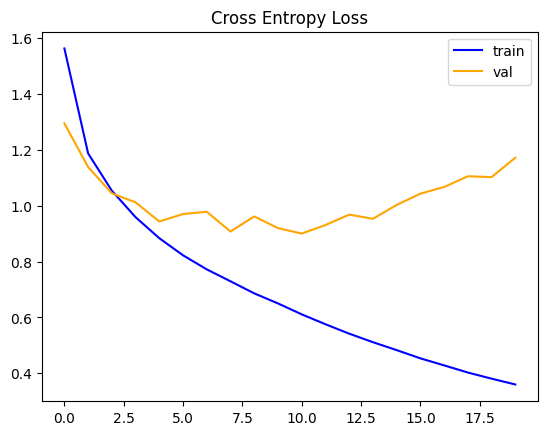

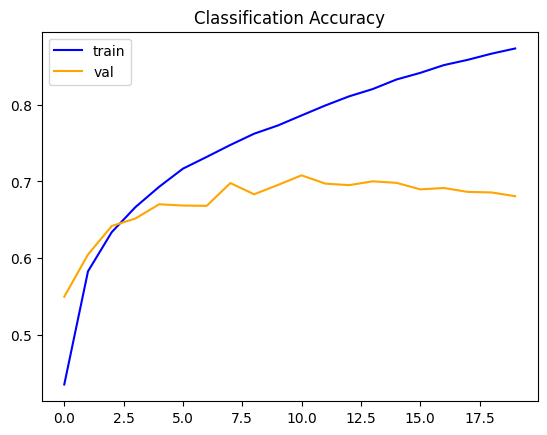

In [15]:

plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [ ]:
# as wee can see in the plot there is a noticeable gap between the training and validation curves.
# Specifically, the model achieves higher accuracy and lower loss on the training data compared to the validation data.
# This gap suggests the model is clearly overfitting

### 2. Simple model with 1 convolutional layer reducing batch size

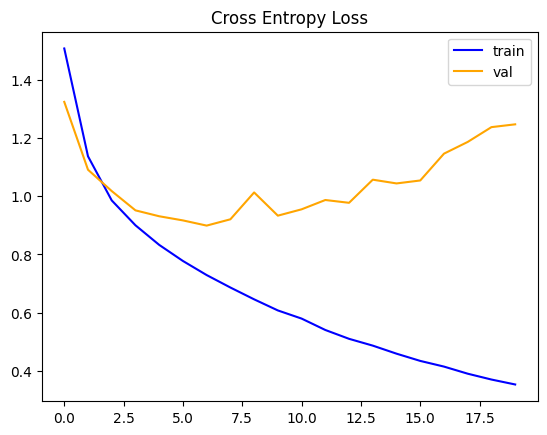

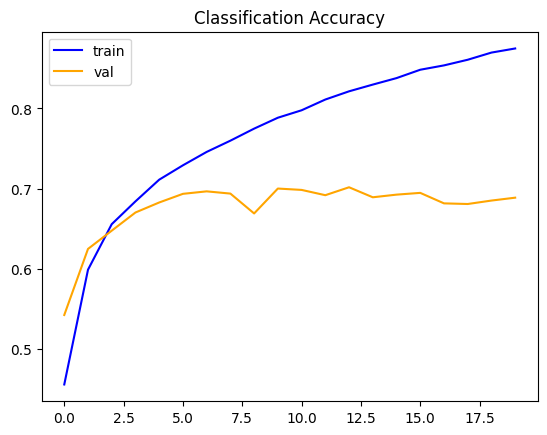

In [15]:

plt.title('Cross Entropy Loss')
plt.plot(history_batch.history['loss'], color='blue', label='train')
plt.plot(history_batch.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history_batch.history['accuracy'], color='blue', label='train')
plt.plot(history_batch.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [ ]:
# as wee can see in the plot there is still a noticeable gap between the training and validation curves.
# We are still overfitting and we did'nt improve the results of our model.

### 3. Model with multiple convolutional layers

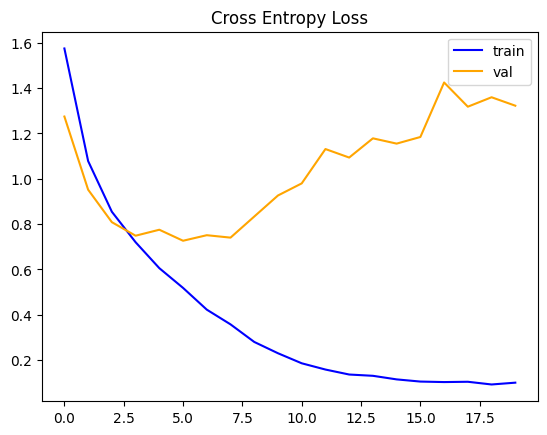

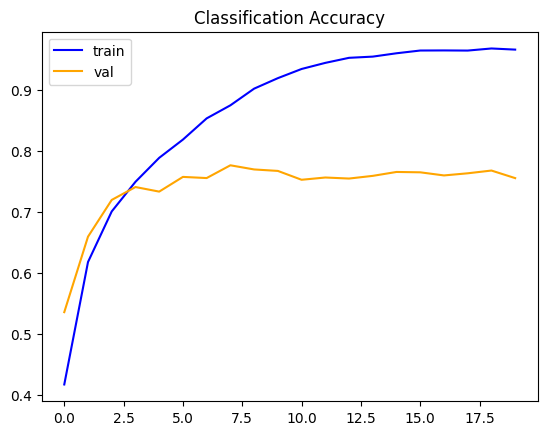

In [15]:

plt.title('Cross Entropy Loss')
plt.plot(history_cnn.history['loss'], color='blue', label='train')
plt.plot(history_cnn.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history_cnn.history['accuracy'], color='blue', label='train')
plt.plot(history_cnn.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [ ]:
# as we can see in the plot the model's high performance on the training set is not matched on the validation set
# while the model shows excellent learning capability on the training data, its performance on the validation set suggests overfitting
# we will try first with dropouts and batch normalization and then with early stopping and data augmentation to try to improve the performance of the model

### 4. Model with multiple convolutional layers, dropouts and batch normalization

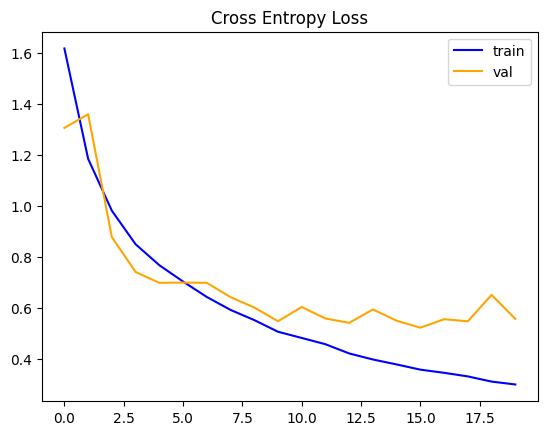

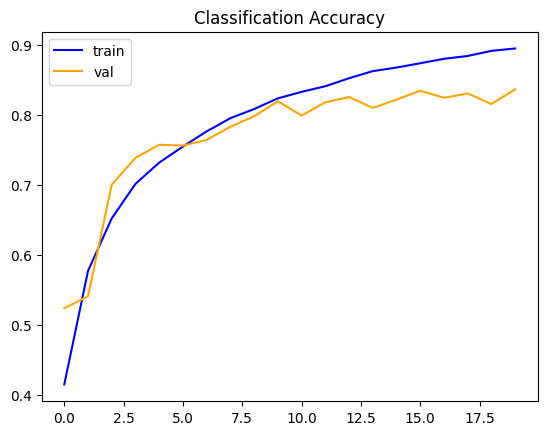

In [15]:

plt.title('Cross Entropy Loss')
plt.plot(history_dropout.history['loss'], color='blue', label='train')
plt.plot(history_dropout.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history_dropout.history['accuracy'], color='blue', label='train')
plt.plot(history_dropout.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [ ]:
# as we can see on the plots the model is generalizing better than before but still has room for improvement
# the addition of dropout and batch normalization seems to have a positive effect on the model's ability to generalize
# However, some overfitting still occurs. We will try with early stopping and data augmentation

### 5. Model with multiple convolutional layers, dropouts, batch normalization and early stopping

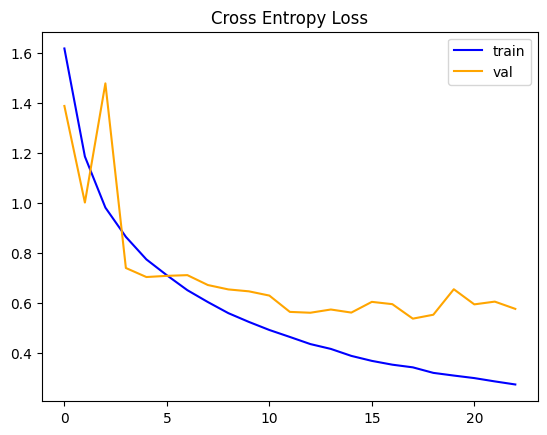

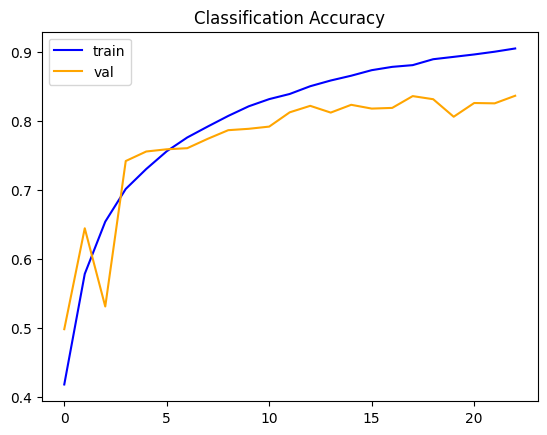

In [16]:

plt.title('Cross Entropy Loss')
plt.plot(history_stp.history['loss'], color='blue', label='train')
plt.plot(history_stp.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history_stp.history['accuracy'], color='blue', label='train')
plt.plot(history_stp.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [ ]:
# The early stopping mechanism seems to be working as intended. The graphs suggest that training was stopped before significant overfitting could occur
# further steps may be required to optimize the model's performance and close the gap between training and validation metrics
# We'll try with data augmentation

### 6. Model with multiple convolutional layers, dropouts, batch normalization, early stopping and data augmentation

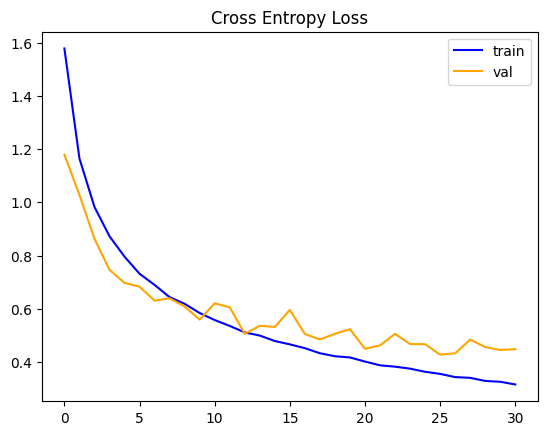

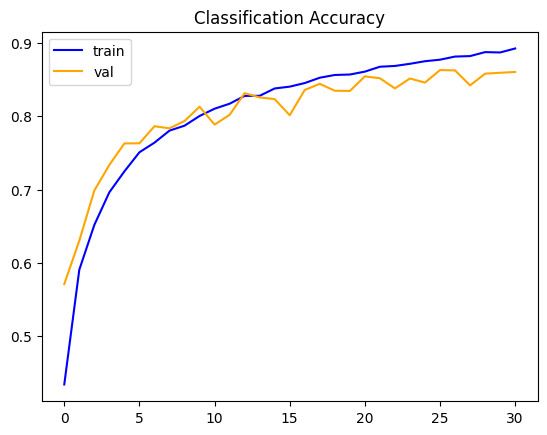

In [19]:

plt.title('Cross Entropy Loss')
plt.plot(history_aug.history['loss'], color='blue', label='train')
plt.plot(history_aug.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history_aug.history['accuracy'], color='blue', label='train')
plt.plot(history_aug.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [ ]:
# the addition of data augmentation seems to have had a positive impact on the model's ability to generalize to new data
# as indicated by the improved validation accuracy and the stabilized validation loss
# the gap between training and validation accuracy was reduced considerabily.
# So far the best model results.

# 8. Predictions of the model

In [ ]:
# We are going to do the predictcions with model with best results which is the oone with data augmentation and early stopping

In [20]:
predictions = aug_model.predict(x_test)

313/313 [==============================] - 2s 3ms/step


One of the advantages of Python is that there are loads of functions and code made by third parties. Here I have shot some nice functions (which I have adapted a bit to my needs) to be able to paint the images, their label (ground truth) and the classifications that we have made.

In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


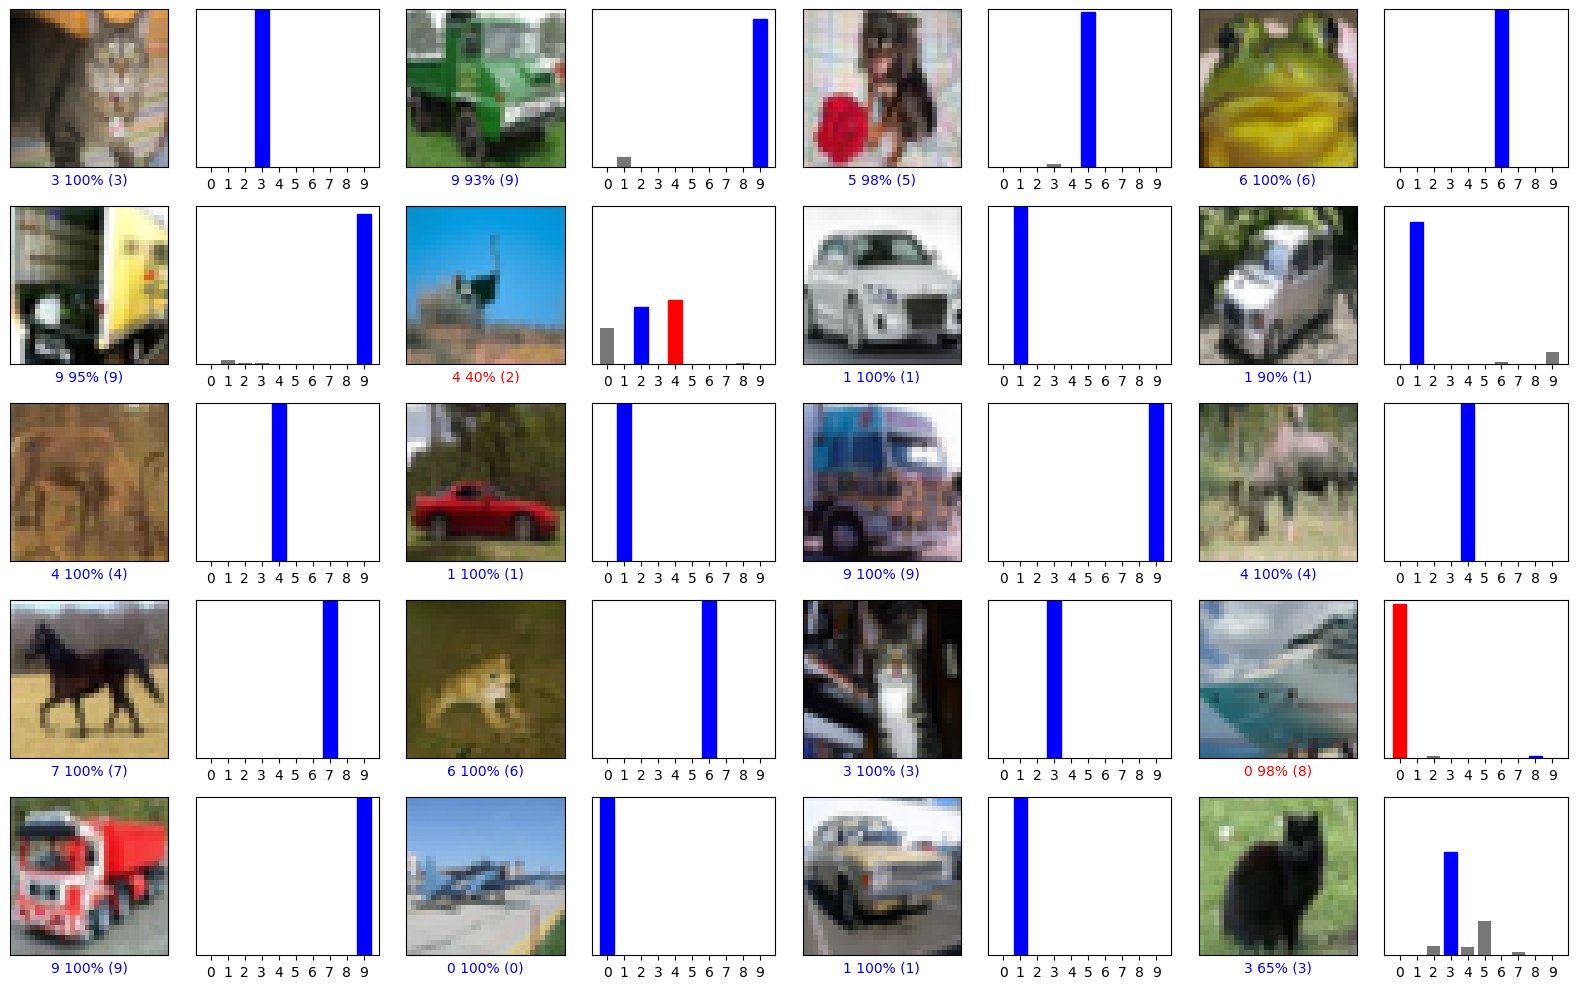

In [22]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

In [ ]:
# As we can see the model predicts pretty well the images
# We just have few cases here in which the model wasn't able to identify the images correctly
# But overall, the model is pretty accurate even if we could improve it even more.

## 9. We save the model for future evaluations

Go changing the names of the file to save the various projects.
Here we save it in "local", but remember that the ideal is that you save it in Google Drive (you have to mount the unit, set the path and save the .h5 model there)

In [24]:
aug_model.save('cifar10_base_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
